In [1]:
import pickle
import os

In [9]:
ls ../datasets/KTH/processed/boxing/

person01_boxing_d1/  person10_boxing_d1/  person19_boxing_d1/
person01_boxing_d2/  person10_boxing_d2/  person19_boxing_d2/
person01_boxing_d3/  person10_boxing_d3/  person19_boxing_d3/
person01_boxing_d4/  person10_boxing_d4/  person19_boxing_d4/
person02_boxing_d1/  person11_boxing_d1/  person20_boxing_d1/
person02_boxing_d2/  person11_boxing_d2/  person20_boxing_d2/
person02_boxing_d3/  person11_boxing_d3/  person20_boxing_d3/
person02_boxing_d4/  person11_boxing_d4/  person20_boxing_d4/
person03_boxing_d1/  person12_boxing_d1/  person21_boxing_d1/
person03_boxing_d2/  person12_boxing_d2/  person21_boxing_d2/
person03_boxing_d3/  person12_boxing_d3/  person21_boxing_d3/
person03_boxing_d4/  person12_boxing_d4/  person21_boxing_d4/
person04_boxing_d1/  person13_boxing_d1/  person22_boxing_d1/
person04_boxing_d2/  person13_boxing_d2/  person22_boxing_d2/
person04_boxing_d3/  person13_boxing_d3/  person22_boxing_d3/
person04_boxing_d4/  person13_boxing_d4/  person22_boxing_d4/
person05

In [5]:
with open('../datasets/KTH/processed/boxing/train_meta128x128.pkl', 'rb') as fi:
    dataset = pickle.load(fi)

In [20]:
for i, vid in enumerate(dataset):
    print(i, vid['vid'])

0 person01_boxing_d1
1 person01_boxing_d2
2 person01_boxing_d3
3 person01_boxing_d4
4 person02_boxing_d1
5 person02_boxing_d2
6 person02_boxing_d3
7 person02_boxing_d4
8 person03_boxing_d1
9 person03_boxing_d2
10 person03_boxing_d3
11 person03_boxing_d4
12 person04_boxing_d1
13 person04_boxing_d2
14 person04_boxing_d3
15 person04_boxing_d4
16 person05_boxing_d1
17 person05_boxing_d2
18 person05_boxing_d3
19 person05_boxing_d4
20 person06_boxing_d1
21 person06_boxing_d2
22 person06_boxing_d3
23 person06_boxing_d4
24 person07_boxing_d1
25 person07_boxing_d2
26 person07_boxing_d3
27 person07_boxing_d4
28 person08_boxing_d1
29 person08_boxing_d2
30 person08_boxing_d3
31 person08_boxing_d4
32 person09_boxing_d1
33 person09_boxing_d2
34 person09_boxing_d3
35 person09_boxing_d4
36 person10_boxing_d1
37 person10_boxing_d2
38 person10_boxing_d3
39 person10_boxing_d4
40 person11_boxing_d1
41 person11_boxing_d2
42 person11_boxing_d3
43 person11_boxing_d4
44 person12_boxing_d1
45 person12_boxing_d

In [30]:
len(dataset[56]['files'][0])

149

## Plot UCF101

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import data.ucf
import numpy as np
from PIL import Image

In [34]:
data_gen = data.ucf.UCF('true', '../datasets', image_size=128, split=1, data_type='sequence')

In [60]:
from PIL import Image
def normalize(kernel):
    minv, maxv = kernel.min(), kernel.max()
    return (kernel - minv) / (maxv - minv)
def normalize_abs(kernel):
    v = np.abs(kernel).max()
    return kernel / (2 * v) + 0.5
def show_filters(kernels, r = 10, c = 10, bw = 1):
    ir, ic, _ = kernels[0].shape
    canvas = np.ones([ir * r + bw * (r + 1), ic * c + bw * (c + 1), 3])
    kernels = np.array(kernels)
    print(kernels.shape)
    kernels = kernels.reshape((r, c, ir, ic, 3))
    for i in range(0, r):
        for j in range(0, c):
            offsetr = ir * i + bw * (i + 1)
            offsetc = ic * j + bw * (j + 1)
#             nimg = normalize_abs(kernels[i, j])
            nimg = kernels[i, j]
            canvas[offsetr : offsetr + ir, offsetc : offsetc + ic] = nimg
    return canvas

In [61]:
imgs = []
n = 4
for _, x in zip(range(n), data_gen):
    for i, t in zip(range(12), x):
        imgs.append(t.numpy())

(48, 128, 128, 3)


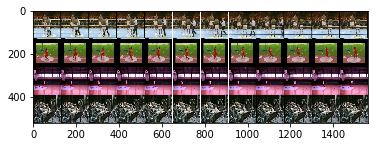

In [63]:
canvas = show_filters(imgs, r=n, c=12, bw=2)
plt.imshow(canvas)

In [65]:
img = Image.fromarray((canvas * 255).astype(np.uint8))

In [66]:
img.save('UCF101_samples.png')